# Importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn import preprocessing
import re
from matplotlib.offsetbox import OffsetImage,AnnotationBbox

# Opening the happiness datasets from 2015 to 2018 and appending them into dataframes

In [2]:
df1 = pd.read_csv("..//datasets//happiness_2015.csv")
df2 = pd.read_csv("..//datasets//happiness_2016.csv")
df3 = pd.read_csv("..//datasets//happiness_2017.csv")
df4 = pd.read_csv("..//datasets//happiness_2018.csv")

# Dropping unnecessary columns and renaming columns for the four dataframes.

In [3]:
df1.drop(columns=['Region', 'Standard Error'], inplace=True)
df1.rename(columns={"Happiness Rank": "Happiness_Rank", "Happiness Score": "Happiness_Score","Economy (GDP per Capita)":"GDP_per_Capita", "Health (Life Expectancy)":"Health_or_Life Expectancy", "Family":"Social_Support", "Trust (Government Corruption)":"Perceptions_Of_Corruption", "Dystopia Residual":"Dystopia_Residual"}, inplace=True)

In [4]:
df2.drop(columns=['Region', 'Lower Confidence Interval', 'Upper Confidence Interval'], inplace=True)
df2.rename(columns={"Happiness Rank": "Happiness_Rank", "Happiness Score": "Happiness_Score", "Family":"Social_Support", "Economy (GDP per Capita)":"GDP_per_Capita", "Health (Life Expectancy)":"Health_or_Life Expectancy","Trust (Government Corruption)":"Perceptions_Of_Corruption", "Dystopia Residual":"Dystopia_Residual"}, inplace=True)

In [5]:
df3.drop(columns=['Whisker.high', 'Whisker.low'], inplace=True)
df3.rename(columns={"Happiness.Rank": "Happiness_Rank", "Happiness.Score": "Happiness_Score", "Family":"Social_Support", "Economy..GDP.per.Capita.":"GDP_per_Capita", "Health..Life.Expectancy.":"Health_or_Life Expectancy","Trust..Government.Corruption.":"Perceptions_Of_Corruption", "Dystopia.Residual":"Dystopia_Residual"}, inplace=True)

In [6]:
df4.rename(columns={"GDP_Per_Capita": "GDP_per_Capita", "Rank": "Happiness_Rank", "Score": "Happiness_Score","Healthy_Life_Expectancy":"Health_or_Life Expectancy","Freedom_To_Make_Life_Choices":"Freedom", "Residual":"Dystopia_Residual"}, inplace=True)
df4.dropna(inplace=True)

# Setting the "Country" column as index to combine the four dataframes into one by using the common Countries.

In [7]:
df1 = df1.set_index('Country')
df2 = df2.set_index('Country')
df3 = df3.set_index('Country')
df4 = df4.set_index('Country')

# Merging the data frames into one and chnaging the suffixes to know which columns belong to which dataset.

In [8]:
dfs = pd.merge(pd.merge(pd.merge(df1,df2,on='Country',suffixes=('', '_x')),df3,on='Country',suffixes=('', '_y')),df4,on='Country',suffixes=('', '_z'))

# Creating new columns in the combined dataframe to get the average between the four dataframes

In [9]:
dfs['Happiness_Score_All'] = (dfs['Happiness_Score_x'] + dfs['Happiness_Score_y'] + dfs['Happiness_Score_z'] + dfs['Happiness_Score'])/4
dfs['GDP_per_Capita_All'] = (dfs['GDP_per_Capita_x'] + dfs['GDP_per_Capita_y'] + dfs['GDP_per_Capita_z'] + dfs['GDP_per_Capita'])/4
dfs['Social_Support__All'] = (dfs['Social_Support_x'] + dfs['Social_Support_y'] + dfs['Social_Support_z'] + dfs['Social_Support'])/4
dfs['Health_or_Life Expectancy_All'] = (dfs['Health_or_Life Expectancy_x'] + dfs['Health_or_Life Expectancy_y'] + dfs['Health_or_Life Expectancy_z'] + dfs['Health_or_Life Expectancy'])/4
dfs['Freedom_All'] = (dfs['Freedom_x'] + dfs['Freedom_y'] + dfs['Freedom_z'] + dfs['Freedom'])/4
dfs['Perceptions_Of_Corruption_All'] = (dfs['Perceptions_Of_Corruption_x'] + dfs['Perceptions_Of_Corruption_y'] + dfs['Perceptions_Of_Corruption_z'] + dfs['Perceptions_Of_Corruption'])/4
dfs['Generosity_All'] = (dfs['Generosity_x'] + dfs['Generosity_y'] + dfs['Generosity_z'] + dfs['Generosity'])/4
dfs['Dystopia_Residual_All'] = (dfs['Dystopia_Residual_x'] + dfs['Dystopia_Residual_y'] + dfs['Dystopia_Residual_z'] + dfs['Dystopia_Residual'])/4

# Resetting the index of the combined dataframe to be able to use the "Country" column for plotting.

In [10]:
dfs = dfs.reset_index()

# Separating the countries of interest and the countries with significant change in happiness to plot be able to plot this change.

There was another code cell that plots the happiness score of all the countries over the last four years, and this is where I knew that these four counties below are the ones with significant change.

In [11]:
venezuela_all = dfs.loc[dfs["Country"] == 'Venezuela'].copy()
yemen_all = dfs.loc[dfs["Country"] == 'Yemen'].copy()
liberia_all = dfs.loc[dfs["Country"] == 'Liberia'].copy()
egypt_all = dfs.loc[dfs["Country"] == 'Egypt'].copy()
haiti_all = dfs.loc[dfs["Country"] == 'Haiti'].copy()
spain_all = dfs.loc[dfs["Country"] == 'Spain'].copy()

# Choosing the font for the plots and plotting the changes in happiness score for the four contries with significant changes and also Spain and Egypt.

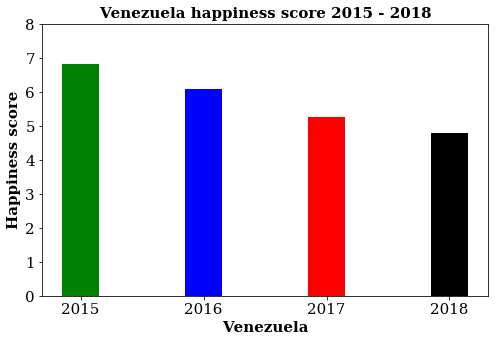

In [12]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.sans-serif'] = 'Oswald'

plt.figure(figsize=(8,5))
plt.bar('2015', venezuela_all['Happiness_Score'], color = 'g', width = 0.3)
plt.bar('2016', venezuela_all['Happiness_Score_x'], color = 'b', width = 0.3)
plt.bar('2017', venezuela_all['Happiness_Score_y'], color = 'r', width = 0.3)
plt.bar('2018', venezuela_all['Happiness_Score_z'], color = 'k', width = 0.3)
plt.title('Venezuela happiness score 2015 - 2018', fontsize=15, fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Happiness score', fontsize = 15, fontweight='bold')
plt.xlabel('Venezuela', fontsize = 15, fontweight='bold')
plt.ylim(0, 8)
plt.savefig("..//images//Happiness changes in Venezuela.jpg")
plt.show()

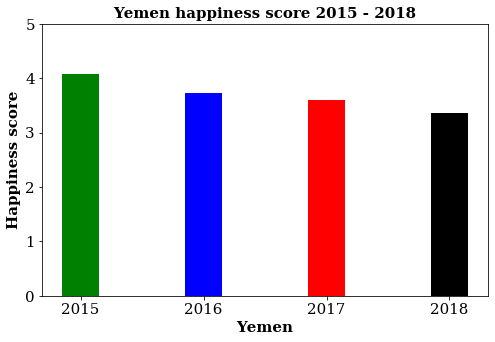

In [13]:
plt.figure(figsize=(8,5))
plt.bar('2015', yemen_all['Happiness_Score'], color = 'g', width = 0.3)
plt.bar('2016', yemen_all['Happiness_Score_x'], color = 'b', width = 0.3)
plt.bar('2017', yemen_all['Happiness_Score_y'], color = 'r', width = 0.3)
plt.bar('2018', yemen_all['Happiness_Score_z'], color = 'k', width = 0.3)
plt.title('Yemen happiness score 2015 - 2018', fontsize=15, fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylim(0, 5)
plt.ylabel('Happiness score', fontsize = 15,fontweight='bold')
plt.xlabel('Yemen', fontsize = 15, fontweight='bold')
plt.savefig("..//images//Happiness changes in Yemen.jpg")
plt.show()

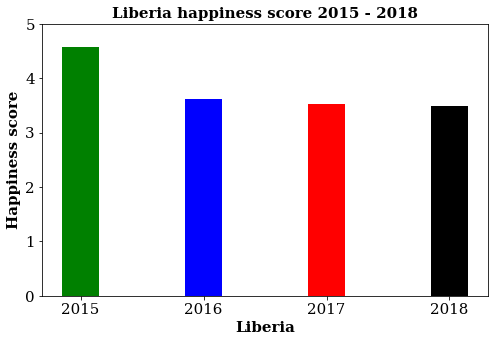

In [14]:
plt.figure(figsize=(8,5))
plt.bar('2015', liberia_all['Happiness_Score'], color = 'g', width = 0.3)
plt.bar('2016', liberia_all['Happiness_Score_x'], color = 'b', width = 0.3)
plt.bar('2017', liberia_all['Happiness_Score_y'], color = 'r', width = 0.3)
plt.bar('2018', liberia_all['Happiness_Score_z'], color = 'k', width = 0.3)
plt.title('Liberia happiness score 2015 - 2018', fontsize=15, fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Happiness score', fontsize = 15, fontweight='bold')
plt.xlabel('Liberia', fontsize = 15, fontweight='bold')
plt.ylim(0, 5)
plt.savefig("..//images//Happiness changes in Liberia.jpg")
plt.show()

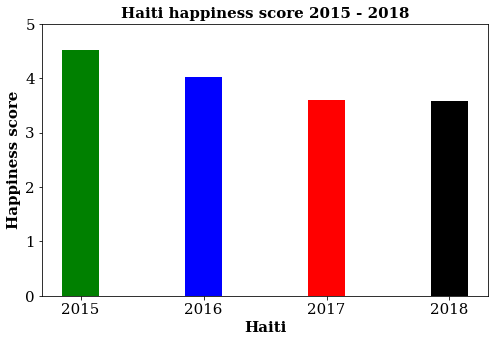

In [15]:
plt.figure(figsize=(8,5))
plt.bar('2015', haiti_all['Happiness_Score'], color = 'g', width = 0.3)
plt.bar('2016', haiti_all['Happiness_Score_x'], color = 'b', width = 0.3)
plt.bar('2017', haiti_all['Happiness_Score_y'], color = 'r', width = 0.3)
plt.bar('2018', haiti_all['Happiness_Score_z'], color = 'k', width = 0.3)
plt.title('Haiti happiness score 2015 - 2018', fontsize=15, fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Happiness score', fontsize = 15, fontweight='bold')
plt.xlabel('Haiti', fontsize = 15, fontweight='bold')
plt.ylim(0, 5)
plt.savefig("..//images//Happiness changes in Haiti.jpg")
plt.show()

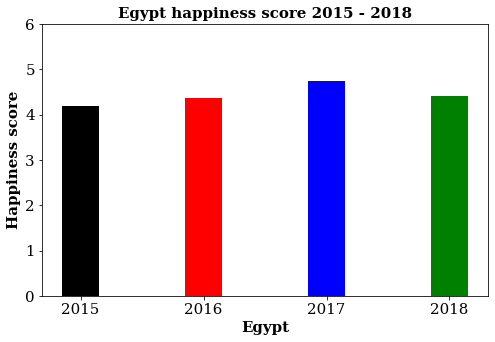

In [16]:
plt.figure(figsize=(8,5))
plt.bar('2015', egypt_all['Happiness_Score'], color = 'k', width = 0.3)
plt.bar('2016', egypt_all['Happiness_Score_x'], color = 'r', width = 0.3)
plt.bar('2017', egypt_all['Happiness_Score_y'], color = 'b', width = 0.3)
plt.bar('2018', egypt_all['Happiness_Score_z'], color = 'g', width = 0.3)
plt.title('Egypt happiness score 2015 - 2018', fontsize=15, fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Happiness score', fontsize = 15, fontweight='bold')
plt.xlabel('Egypt', fontsize = 15, fontweight='bold')
plt.ylim(0, 6)
plt.savefig("..//images//Happiness changes in Egypt.jpg")
plt.show()

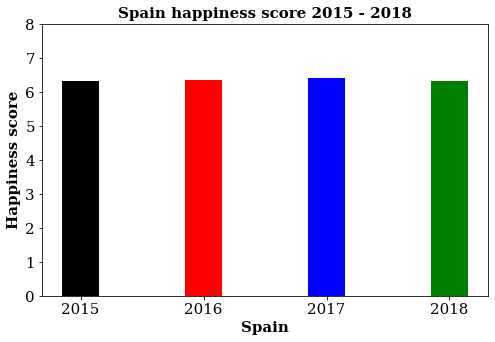

In [17]:
plt.figure(figsize=(8,5))
plt.bar('2015', spain_all['Happiness_Score'], color = 'k', width = 0.3)
plt.bar('2016', spain_all['Happiness_Score_x'], color = 'r', width = 0.3)
plt.bar('2017', spain_all['Happiness_Score_y'], color = 'b', width = 0.3)
plt.bar('2018', spain_all['Happiness_Score_z'], color = 'g', width = 0.3)
plt.title('Spain happiness score 2015 - 2018', fontsize=15, fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Happiness score', fontsize = 15, fontweight='bold')
plt.xlabel('Spain', fontsize = 15, fontweight='bold')
plt.ylim(0, 8)
plt.savefig("..//images//Happiness changes in Spain.jpg")
plt.show()

# Dropping the unnecessary columns from the combined dataframe and sorting it by happiness score after.

In [18]:
dfs.drop(columns=['Happiness_Rank', 'Happiness_Score', 'GDP_per_Capita', 'Social_Support',
       'Health_or_Life Expectancy', 'Freedom', 'Perceptions_Of_Corruption',
       'Generosity', 'Dystopia_Residual', 'Happiness_Rank_x',
       'Happiness_Score_x', 'GDP_per_Capita_x', 'Social_Support_x',
       'Health_or_Life Expectancy_x', 'Freedom_x',
       'Perceptions_Of_Corruption_x', 'Generosity_x', 'Dystopia_Residual_x',
        'Happiness_Rank_y', 'Happiness_Score_y', 'GDP_per_Capita_y',
       'Social_Support_y', 'Health_or_Life Expectancy_y', 'Freedom_y',
       'Generosity_y', 'Perceptions_Of_Corruption_y', 'Dystopia_Residual_y',
       'Happiness_Rank_z', 'Happiness_Score_z', 'GDP_per_Capita_z',
       'Social_Support_z', 'Health_or_Life Expectancy_z', 'Freedom_z',
       'Generosity_z', 'Perceptions_Of_Corruption_z', 'Dystopia_Residual_z'], inplace=True)


dfs = dfs.sort_values(["Happiness_Score_All"],ascending=False)

# Saving the cleaned and combined dataset to the datasets folder as a CSV file.

In [19]:
dfs.to_csv('..//datasets//Happiness_combined_years.csv', index=False)

# Appending the top 5, bottom 5, Spain and Egypt into a separate dataframe to be able to plot them all together.

In [20]:
countries = ["Norway", "Denmark", "Switzerland", "Iceland", 'Finland', 'Spain', 'Egypt', 'Afghanistan', 'Rwanda', 'Togo', 'Syria', 'Burundi']
countries_to_plot = pd.DataFrame()
for i in countries:
    row = dfs.loc[dfs['Country'] == i]
    countries_to_plot = countries_to_plot.append(row)
countries_to_plot = countries_to_plot.sort_values(by='Happiness_Score_All', ascending=False)

# Creating a new list with the happiness score and the name of the country to show them above each bar and make the plot more visual.

In [21]:
lst_of_scores = list(countries_to_plot['Happiness_Score_All'])
lst_of_countries =  list(countries_to_plot['Country'])
new_list = []
lst_of_scores = [ '%.3f' % elem for elem in lst_of_scores]

for i, j in zip(lst_of_scores, lst_of_countries):
                     new_list.append(f"{i} \n {j}")

# Creating a function to access the flags of the countries from the images folder and plot them as ticks for each bar on the x-axis.

In [22]:
def get_flag(name):
    path = "..//images//{}.png".format(name.title())
    im = plt.imread(path)
    return im

def offset_image(coord, name, ax):
    img = get_flag(name)
    im = OffsetImage(img, zoom=0.72)
    im.image.axes = ax

    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -45.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)

# Choosing the colors for the bars and the spacing for the texts, labels, title and ticks and saving the plot to the images folder.

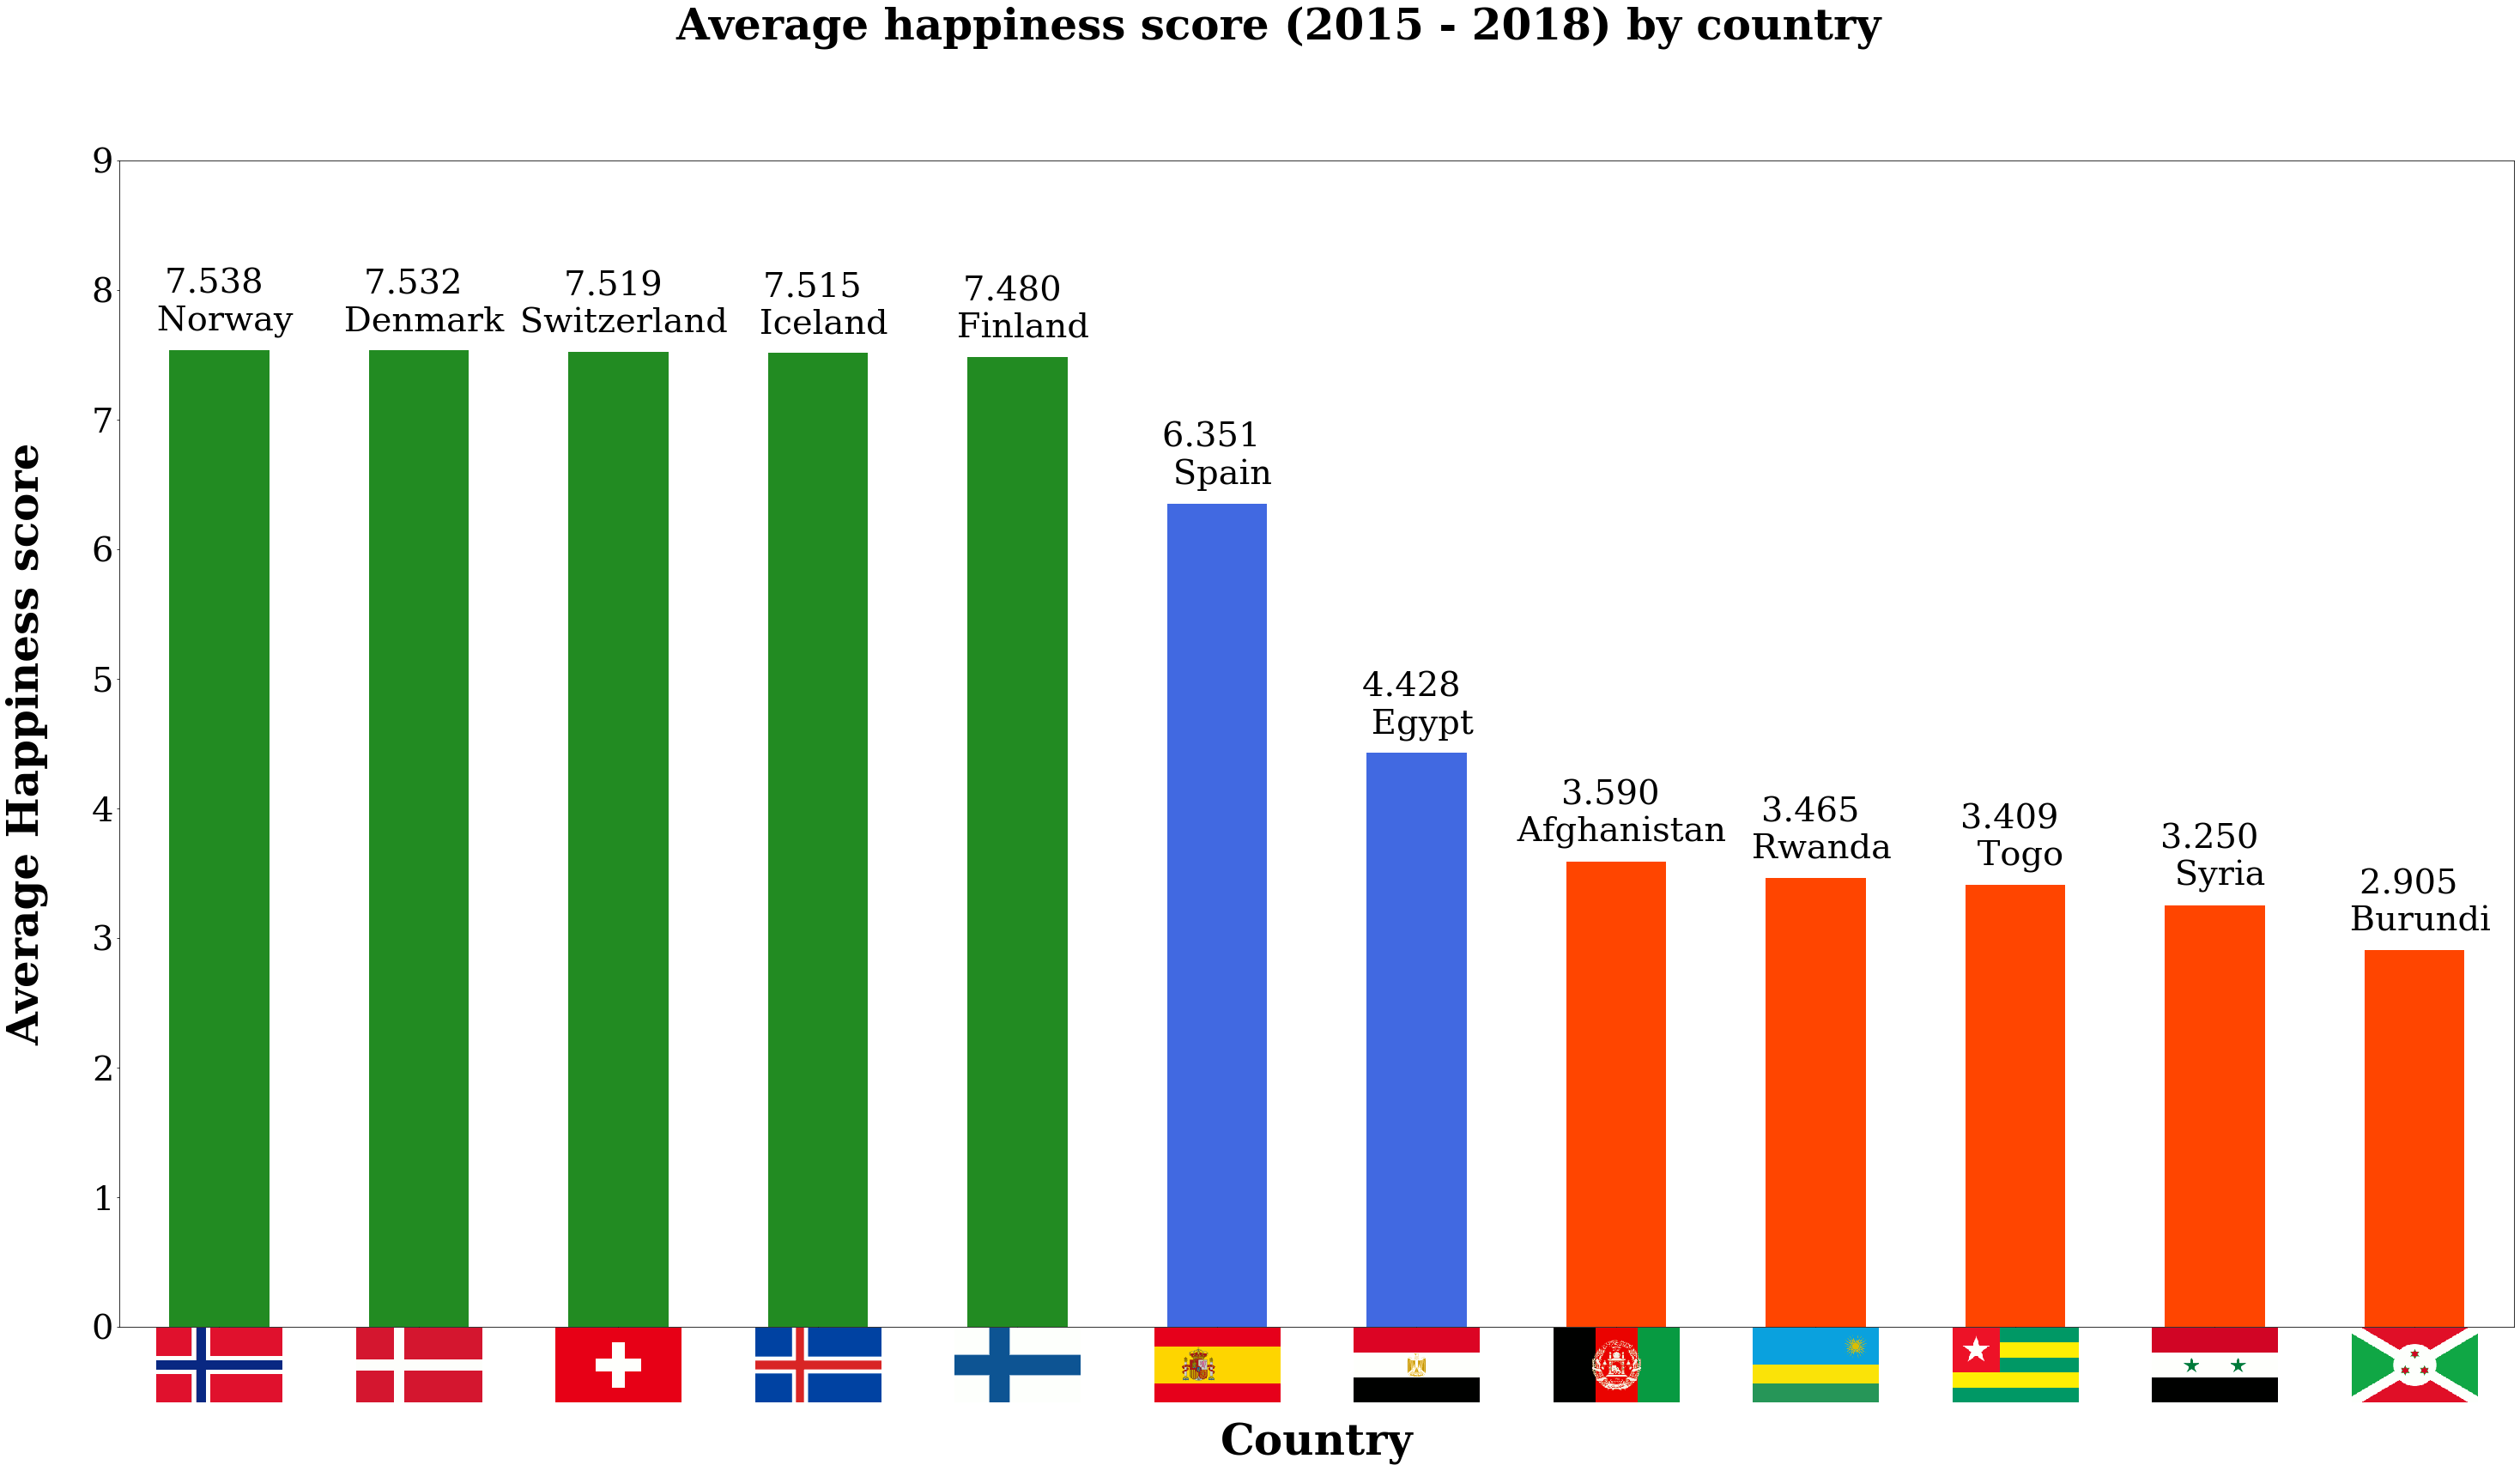

In [23]:
colors = ['forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','royalblue','royalblue','orangered','orangered','orangered','orangered','orangered']
chart1 = countries_to_plot.plot(x='Country', y='Happiness_Score_All', kind='bar', color=colors, figsize=(50,25))
chart1.set_xticklabels(chart1.get_xticklabels(),rotation=0,horizontalalignment='right',fontweight='light',fontsize=5)

rects = chart1.patches
labels=new_list
for rect, label in zip(rects, labels):
    height = rect.get_height()
    chart1.text(rect.get_x() + rect.get_width()/2, height + 0.1, label, ha='center', va='bottom', fontsize=40)

plt.yticks(fontsize=40)
plt.xlabel('Country', fontsize=50, fontweight='bold', labelpad=100)
plt.ylabel('Average Happiness score', fontsize=50, fontweight='bold', labelpad=50)
plt.suptitle('Average happiness score (2015 - 2018) by country', fontsize=50, fontweight='bold')
chart1.get_legend().remove()

plt.ylim(0,9)

for i, c in enumerate(countries):
    offset_image(i, c, chart1)

plt.savefig("..//images//Countries by rank.jpg")
plt.show()

# Opening the Average annual working hours dataset into a dataframe.

In [24]:
working_hours = pd.read_csv("..//datasets//annual-working-hours.csv")

# Dropping an unnecessary column and renaming columns in the dataframe to be able to merge and identify later.

In [25]:
working_hours.drop(columns=['Code'], inplace=True)
working_hours.rename(columns={"Entity": "Country", "Average annual hours worked by persons engaged (hours per person engaged)": "Average_working_hours"}, inplace=True)

# Running a query to keep only the years of interest.

In [26]:
working_hours = working_hours.query('Year == 2015 or Year == 2016 or Year == 2017 or Year == 2018')

# Grouping the dataframe by country and taking the average of working hours over the years of interest.

In [27]:
working_hours = working_hours.groupby('Country').agg({'Average_working_hours': 'mean'})

# Setting the "Country" column as index to be able to merge this dataframe with the combined happiness dataframe using the common Countries.

In [28]:
dfs = dfs.set_index('Country')

# Merging the two dataframes together.

In [29]:
happiness_and_working_hrs = pd.merge(dfs,working_hours,on='Country')

# Sorting the new dataframe by happiness score.

In [30]:
happiness_and_working_hrs = happiness_and_working_hrs.sort_values(["Happiness_Score_All"],ascending=False)

# Dropping the unnecessary column and keeping only the country, happiness score and the average working hours columns.

In [31]:
happiness_and_working_hrs.drop(columns=['GDP_per_Capita_All', 'Social_Support__All','Health_or_Life Expectancy_All', 'Freedom_All','Perceptions_Of_Corruption_All', 'Generosity_All','Dystopia_Residual_All'], inplace=True)

# Resetting the index.

In [32]:
happiness_and_working_hrs = happiness_and_working_hrs.reset_index()

# Plotting the two columns (Happiness score and Average working hours) and finding the slope, intercept, correlation, covarience, p-value, R^2, Standerd deviation error to see the relationship between both of them.

The slope is: -166.1623014244086
The intercept is: 2871.8142133855545
The correlation is: -0.6073747448135308
The covarience is: -149.38323429044726


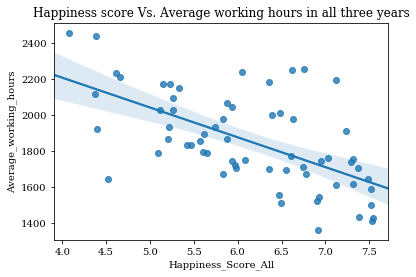

In [33]:
slope, intercept, r_value, p_value, std_err = stats.linregress(happiness_and_working_hrs['Happiness_Score_All'], happiness_and_working_hrs["Average_working_hours"])
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print ('The correlation is: ' + str(happiness_and_working_hrs['Happiness_Score_All'].corr(happiness_and_working_hrs["Average_working_hours"])))
print ('The covarience is: ' + str(happiness_and_working_hrs['Happiness_Score_All'].cov(happiness_and_working_hrs["Average_working_hours"])))
sns.regplot(x='Happiness_Score_All',y='Average_working_hours' , data=happiness_and_working_hrs)
plt.title("Happiness score Vs. Average working hours in all three years")
plt.show()

In [34]:
X = sm.add_constant(happiness_and_working_hrs[['Happiness_Score_All']])
model = sm.OLS(happiness_and_working_hrs.Average_working_hours,X)
results = model.fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     Average_working_hours   R-squared:                       0.369
Model:                               OLS   Adj. R-squared:                  0.359
Method:                    Least Squares   F-statistic:                     36.24
Date:                   Thu, 28 Nov 2019   Prob (F-statistic):           1.03e-07
Time:                           20:53:45   Log-Likelihood:                -431.31
No. Observations:                     64   AIC:                             866.6
Df Residuals:                         62   BIC:                             870.9
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
cons

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Saving the dataset into the datasets folder.

In [35]:
happiness_and_working_hrs.to_csv('..//datasets//happiness_and_working_hrs.csv', index=False)

# Opening the Alcohol consumption dataset into a dataframe.

In [36]:
alcohol_consumption = pd.read_csv("..//datasets//alcohol_consumption.csv")

# Dropping an unnecessary column and renaming columns in the dataframe to be able to merge and identify later.

In [37]:
alcohol_consumption.drop(columns=['beer_servings', 'spirit_servings', 'wine_servings', 'continent'], inplace=True)
alcohol_consumption.rename(columns={"country": "Country", 'total_litres_of_pure_alcohol': "Average_alcohol_consumption"}, inplace=True)

# Setting the "Country" column as index to be able to merge this dataframe with the combined happiness dataframe using the common Countries.

In [38]:
alcohol_consumption = alcohol_consumption.set_index('Country')

# Merging the two dataframes together.

In [39]:
happiness_and_alcohol_consumption = pd.merge(dfs,alcohol_consumption,on='Country')

# Dropping the unnecessary column and keeping only the country, happiness score and the average alcohol consumption columns.

In [40]:
happiness_and_alcohol_consumption.drop(columns=['GDP_per_Capita_All', 'Social_Support__All','Health_or_Life Expectancy_All', 'Freedom_All','Perceptions_Of_Corruption_All', 'Generosity_All','Dystopia_Residual_All'], inplace=True)

# Resetting the index.

In [41]:
happiness_and_alcohol_consumption = happiness_and_alcohol_consumption.reset_index()

# Plotting the two columns (Happiness score and Average alcohol consumption) and finding the slope, intercept, correlation, covarience, p-value, R^2, Standerd deviation error to see the relationship between both of them.

The slope is: 1.5869631047396817
The intercept is: -3.471179544458213
The correlation is: 0.4595306656325678
The covarience is: 2.0412875071076257


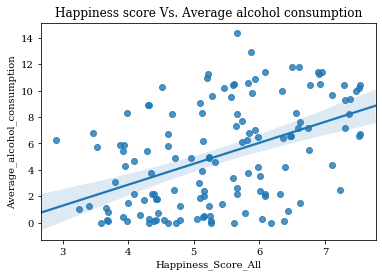

In [42]:
slope, intercept, r_value, p_value, std_err = stats.linregress(happiness_and_alcohol_consumption['Happiness_Score_All'], happiness_and_alcohol_consumption["Average_alcohol_consumption"])
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print ('The correlation is: ' + str(happiness_and_alcohol_consumption['Happiness_Score_All'].corr(happiness_and_alcohol_consumption["Average_alcohol_consumption"])))
print ('The covarience is: ' + str(happiness_and_alcohol_consumption['Happiness_Score_All'].cov(happiness_and_alcohol_consumption["Average_alcohol_consumption"])))
sns.regplot(x='Happiness_Score_All',y='Average_alcohol_consumption' , data=happiness_and_alcohol_consumption)
plt.title("Happiness score Vs. Average alcohol consumption")
plt.show()

In [43]:
X = sm.add_constant(happiness_and_alcohol_consumption[['Happiness_Score_All']])
model = sm.OLS(happiness_and_alcohol_consumption.Average_alcohol_consumption,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:     Average_alcohol_consumption   R-squared:                       0.211
Model:                                     OLS   Adj. R-squared:                  0.205
Method:                          Least Squares   F-statistic:                     35.60
Date:                         Thu, 28 Nov 2019   Prob (F-statistic):           2.07e-08
Time:                                 20:53:46   Log-Likelihood:                -359.35
No. Observations:                          135   AIC:                             722.7
Df Residuals:                              133   BIC:                             728.5
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

# Saving the dataset into the datasets folder.

In [44]:
happiness_and_alcohol_consumption.to_csv('..//datasets//happiness_and_alcohol_consumption.csv', index=False)

# Opening the Suicide statistics dataset into a dataframe.

In [45]:
suicide = pd.read_csv("..//datasets//who_suicide_statistics.csv")

# Dropping unnecessary columns and renaming columns in the dataframe to be able to merge and identify later.

In [46]:
suicide.drop(columns=['sex', 'age'], inplace=True)
suicide.rename(columns={"country": "Country", 'year': "Year", "suicides_no":"Number_of_Suicides"}, inplace=True)

# Running a query to keep only the years of interest.

In [47]:
suicide = suicide.query('Year == 2015 or Year == 2016 or Year == 2017 or Year == 2018')

# Grouping the dataframe by country and taking the sum of the number of suicide and the population in the years of interest .

In [48]:
suicide = suicide.groupby('Country').agg({'Number_of_Suicides': 'sum', 'population':'sum'})

# Renaming the United states because it had a different name, to avoid dropping it while merging.

In [49]:
suicide = suicide.rename(index={'United States of America': 'United States'})

# Creating a new column with the percentage of suicides to make it more representative.

In [50]:
suicide['Suicide_percentage'] = (suicide['Number_of_Suicides'] /  suicide['population']) * 100

# Replacing the inf values with nan to be able to drop them later.

In [51]:
suicide = suicide.replace([np.inf, -np.inf], np.nan)

# Dropping nan values.

In [52]:
suicide.dropna(inplace=True)

# Merging the two dataframes together.

In [53]:
happiness_and_suicide = pd.merge(dfs, suicide,on='Country')

# Dropping the unnecessary column and keeping only the country, happiness score and Suicide percentage columns.

In [54]:
happiness_and_suicide.drop(columns=['GDP_per_Capita_All', 'Social_Support__All','Health_or_Life Expectancy_All', 'Freedom_All','Perceptions_Of_Corruption_All', 'Generosity_All','Dystopia_Residual_All', 'Number_of_Suicides', 'population'], inplace=True)

# Resetting the index.

In [55]:
happiness_and_suicide = happiness_and_suicide.reset_index()

# Plotting the two columns (Happiness score and Suicide percentage) and finding the slope, intercept, correlation, covarience, p-value, R^2, Standerd deviation error to see the relationship between both of them.

The slope is: 0.0008789717881162429
The intercept is: 0.0048486341142865
The correlation is: 0.12034568750282677
The covarience is: 0.000729393881948991


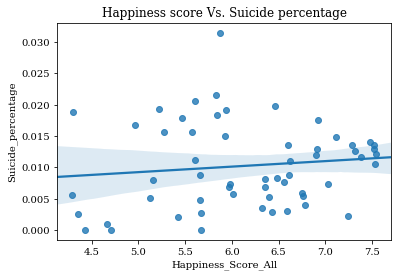

In [56]:
slope, intercept, r_value, p_value, std_err = stats.linregress(happiness_and_suicide['Happiness_Score_All'], happiness_and_suicide['Suicide_percentage'])
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print ('The correlation is: ' + str(happiness_and_suicide['Happiness_Score_All'].corr(happiness_and_suicide['Suicide_percentage'])))
print ('The covarience is: ' + str(happiness_and_suicide['Happiness_Score_All'].cov(happiness_and_suicide['Suicide_percentage'])))
sns.regplot(x='Happiness_Score_All',y='Suicide_percentage' , data=happiness_and_suicide)
plt.title("Happiness score Vs. Suicide percentage")
plt.show()

In [57]:
X = sm.add_constant(happiness_and_suicide[['Happiness_Score_All']])
model = sm.OLS(happiness_and_suicide.Suicide_percentage,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     Suicide_percentage   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8083
Date:                Thu, 28 Nov 2019   Prob (F-statistic):              0.373
Time:                        20:53:49   Log-Likelihood:                 205.76
No. Observations:                  57   AIC:                            -407.5
Df Residuals:                      55   BIC:                            -403.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0048    

# Saving the dataset into the datasets folder.

In [58]:
happiness_and_suicide.to_csv('..//datasets//happiness_and_suicide.csv', index=False)

# Opening the obesity dataset into a dataframe.

In [59]:
obesity = pd.read_csv("..//datasets//obesity.csv")

# Dropping the rows that had multi index.

In [60]:
obesity = obesity.drop([0,1,2])

# Dropping the unnecessary columns and renaming columns in the dataframe to be able to merge and identify later.

In [61]:
columns_to_remove = list(obesity.columns)
to_remove = ["Unnamed: 0", "2016", "2015", "2014"]
for i in to_remove:
    columns_to_remove.remove(i)

In [62]:
obesity.drop(columns=columns_to_remove, inplace=True)

In [63]:
obesity.rename(columns={'Unnamed: 0': "Country"}, inplace=True)
obesity = obesity.reset_index()
obesity.drop(columns="index", inplace=True)

# Removing the list with the [Min - Max] Obesity level from the columns for each year.

In [64]:
obesity['2016'] = obesity['2016'].str.replace(r' \[(.*?)\]', '')
obesity['2015'] = obesity['2015'].str.replace(r' \[(.*?)\]', '')
obesity['2014'] = obesity['2014'].str.replace(r' \[(.*?)\]', '')

# Changing the cells into numeric instead of string to be able to perform calculations on these columns.

Tried the astype function, but it didn't work, so I used this one instead.

In [65]:
obesity["2014"] = obesity["2014"].convert_objects(convert_numeric=True)
obesity["2015"] = obesity["2015"].convert_objects(convert_numeric=True)
obesity["2016"] = obesity["2016"].convert_objects(convert_numeric=True)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package s

# Creating a new column that has the average Obesity in the three years combined.

In [66]:
obesity['Average_obesity'] = (obesity['2014'] + obesity['2015'] + obesity['2016'])/3

# Dropping the unnecessary columns. And setting the "Country" column as index to be able to merge this dataframe with the combined happiness dataframe using the common Countries.

In [67]:
obesity.drop(columns=["2016","2015","2014"], inplace=True)
obesity = obesity.set_index('Country')

# Merging the obesity dataframe with the combined happiness dateframe.

In [68]:
happiness_and_obesity = pd.merge(dfs, obesity,on='Country')

# Dropping nan values.

In [69]:
happiness_and_obesity.dropna(inplace=True)

# Dropping the unnecessary column and keeping only the country, happiness score and the average obesity columns.

In [70]:
happiness_and_obesity.drop(columns=['GDP_per_Capita_All', 'Social_Support__All','Health_or_Life Expectancy_All', 'Freedom_All','Perceptions_Of_Corruption_All', 'Generosity_All','Dystopia_Residual_All'], inplace=True)

# Resetting the index.

In [71]:
happiness_and_obesity = happiness_and_obesity.reset_index()

# Plotting the two columns (Happiness score and Average obesity) and finding the slope, intercept, correlation, covarience, p-value, R^2, Standerd deviation error to see the relationship between both of them.

The slope is: 8.8751206662181
The intercept is: -0.2867316687015986
The correlation is: 0.632817142292163
The covarience is: 11.42159956501891


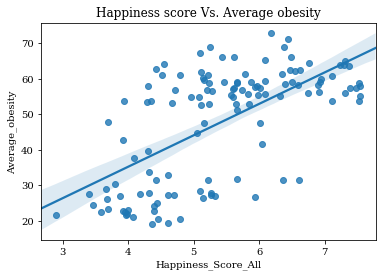

In [72]:
slope, intercept, r_value, p_value, std_err = stats.linregress(happiness_and_obesity['Happiness_Score_All'], happiness_and_obesity["Average_obesity"])
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print ('The correlation is: ' + str(happiness_and_obesity['Happiness_Score_All'].corr(happiness_and_obesity["Average_obesity"])))
print ('The covarience is: ' + str(happiness_and_obesity['Happiness_Score_All'].cov(happiness_and_obesity["Average_obesity"])))
sns.regplot(x='Happiness_Score_All',y='Average_obesity' , data=happiness_and_obesity)
plt.title("Happiness score Vs. Average obesity")
plt.show()

In [73]:
X = sm.add_constant(happiness_and_obesity[['Happiness_Score_All']])
model = sm.OLS(happiness_and_obesity.Average_obesity,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Average_obesity   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     81.49
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           3.15e-15
Time:                        20:53:51   Log-Likelihood:                -486.83
No. Observations:                 124   AIC:                             977.7
Df Residuals:                     122   BIC:                             983.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2867    

# Saving the dataset into the datasets folder.

In [74]:
happiness_and_obesity.to_csv('..//datasets//happiness_and_obesity.csv', index=False)